In [1]:
import networkx as nx
from matplotlib import pyplot
import aisa

# This is an example notebook for AISA

In this notebook we show how to use the module `aisa` to create a partition of you graph or dynamics and calculate the related Entrogram.

See the following papers for reference:

- **Entrograms and coarse graining of dynamics on complex networks**,
    *Faccin, Schaub and Delvenne*,
    [Journal of Complex Networks, 6(5) p. 661-678 (2018)](https://academic.oup.com/comnet/article-abstract/6/5/661/4587985) [[ArXiv](https://arxiv.org/abs/1711.01987)]

- **State aggregations in Markov chains and block models of networks**,
    *Faccin, Schaub and Delvenne* [[ArXiv](https://arxiv.org/abs/2005.00337)]

## Load a graph

for example the Karate Club

In [2]:
graph = nx.karate_club_graph()
print('Nodes:', len(graph))
print('Edges:', graph.number_of_edges())

Nodes: 34
Edges: 78


# Load the partition

In [3]:
partition = {n: data['club'] for n, data in graph.nodes(data=True)}
print(partition)

{0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}


# Compute the Entrogram

In [4]:
depth = 4
entrogram = aisa.entrogram(graph, partition, depth=depth)
entrogram

(0.5555265456648661, array([0.03121669, 0.00152005, 0.00047187, 0.00011017]))

# Draw the Entrogram

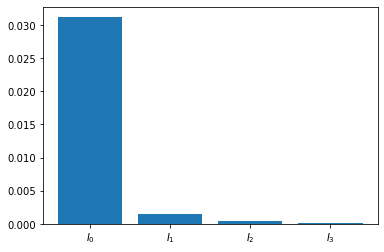

In [5]:
axis = pyplot.axes()
axis.bar(range(depth), entrogram[1])
axis.set_xticks(range(depth))
axis.set_xticklabels([f'$I_{i}$' for i in range(depth)])
pyplot.show()

# Find the best partition
according to the time scale parameter $T$ and the model selection parameter $\beta$.

In [6]:
best_partition, ai = aisa.best_partition(graph, T=2, beta=0.2)
print("Autoinformation", ai)

3 [3]:   7%|▋         | 690/10000 [00:01<00:25, 362.83it/s]

Autoinformation 0.1644140468118871


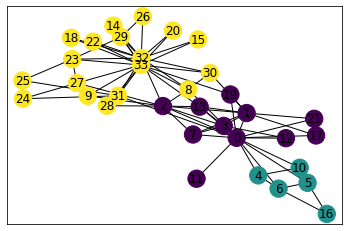

In [7]:
for node, part in best_partition.items():
    graph.nodes[node]['part'] = part
nx.draw_networkx(graph, node_color=[best_partition[n] for n in graph.nodes()])